# Code for BWI
#### Code & Win Challenge by Get in IT
## Nutzenmaximierung der ersten Fahrt nach Bonn mit 2 Transporter

<img src="transporter2.png" alt="split-apply-combine" style="width: 600px;"/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dataframe erstellen

In [2]:
name = ["Notebook Büro 13", "Notebook Büro 14", "Notebook outdoor", "Mobiltelefon Büro", 
        "Mobiltelefon Outdoor", "Mobiltelefon Heavy Duty", "Tablet Büro klein", "Tablet Büro groß", 
        "Tablet outdoor klein", "Tablet outdoor groß"]
anzahl = [205, 420, 450, 60, 157, 220, 620, 250, 540, 370]
gewicht = [2451, 2978, 3625, 717, 988, 1220, 1405, 1455, 1690, 1980]
nutzen = [40, 35, 80, 30, 60, 65, 40, 40, 45, 68]
df = pd.DataFrame({'name':name, 'anzahl':anzahl, "gewicht":gewicht, "nutzen":nutzen})

In [20]:
fahrer = np.array([72.4, 85.7])
max_kap = (np.array([1100, 1100]) - fahrer)*1000
max_kap

array([1027600., 1014300.])

## Funktion zum Beladen der Transporter

Beschreibung:

Als input wird der Funktion ein Pandas-Dataframe mit name, anzahl, gewicht und nutzen sowie die zwei Beladungskapazitäten für die Transporter in Gramm (abgezogen die Fahrer) gegeben. Da der Nutzen maximiert werden soll, wird ein score berechnet, der den Nutzen des Objekts pro Gramm wiedergibt. Gemessen an diesem Score werden die Objekte mit dem größten Nutzen pro Gramm als erstes in die Transporter geladen. Da die Nutzen unabhängig voneinander sind, ergeben sich keine Abhängigkeiten (wie zum Beispiel dass sich der Nutzen eines Tablets erhöhen könnte, wenn ein Mobiltelefon dabei ist), und es werden alle Objekte einer Kategorie jeweils geladen, bis die Anzahl erfüllt ist. Die Transporter werden dabei abwechselnd beladen, damit nicht ein Transporter mit leichteren Gegenständen gefüllt ist und im zweiten Platz übrig bleibt, da kein schwerer Gegenstand mehr reinpasst. 

In [30]:
#Inuput structure: (dataframe["name", "anzahl" nutzen", "gewicht"], [capacity_transporter1, capacity_transporter2])

def loading_strategy(df, max_kap):
    # Calculate a score for utility per gramm
    df["score"] = df["nutzen"]/df["gewicht"]
    # Sort the dataframe according to the value the object has per gramm
    df = df.sort_values(by=['score'], ascending = False).reset_index(drop=True)

    ######### prepare parameters ############
    # Both transporters are empty at the beginning (status = ok)
    status1 = "ok"
    status2 = "ok"
    ladung1 = 0
    ladung2 = 0
    nutzen = 0
    obj = []
    num1 = []
    num2 = []
    
    ######### Start loading transporter ############ 
    for i in np.arange(len(df)):
        anzahl = df["anzahl"][i] # get number of ojects needed in Bonn
        if anzahl == 0:
            pass
        obj.append(df["name"][i])
        num1.append(0)
        num2.append(0)
        
        for e in np.arange(anzahl):
            # To use space in both transporter efficiently, start loading transporter 1 and transporter 2 alternately
            if (((e+1) % 2) == 0) and (status1 == "ok"):
                ladung1 += df["gewicht"][i]
                num1[i] +=1
                if ladung1 >= max_kap[0]:
                    print("Transport1 full")
                    status1 = "full"
                    ladung1 -= df["gewicht"][i]
                    num1[i] -= 1
            elif (((e+1) % 2) != 0) and (status2 == "ok"):
                ladung2 += df["gewicht"][i]
                num2[i] +=1 
                if ladung2 >= max_kap[1]:
                    status2 = "full"
                    print("Transport2 full")
                    ladung2 -= df["gewicht"][i]
                    num2[i] -= 1
                    
            # If transporter 1 is full, try if there is still space in transporter 2
            elif (status1 == "full") and (status2 == "ok"):
                ladung2 += df["gewicht"][i]
                num2[i] +=1 
                if ladung2 >= max_kap[1]:
                    status2 = "full"
                    ladung2 -= df["gewicht"][i]
                    num2[i] -= 1
            # If first transporter 2 is full, try if there is still space in transporter 1
            elif (status1 == "ok") and (status2 == "full"):
                ladung1 += df["gewicht"][i]
                num1[i] +=1 
                if ladung1 >= max_kap[0]:
                    status1 = "full"
                    ladung1 -= df["gewicht"][i]
                    num1[i] -= 1
            # If both are full, no more objects can be loaded
            elif (status1 == "full") and (status2 == "full"):
                print("Transport 1 und 2 full")
                break
    result = pd.DataFrame({'obj':obj, "transporter1":num1, "transporter2":num2, "nutzen":df["nutzen"]})
    result["sum_nutzen"] = (result["transporter1"]+result["transporter2"])*result["nutzen"]
    return result, ladung1, ladung2

## Test der Funktion mit den gegebenen Daten

In [29]:
result, ladung1, ladung2 = loading_strategy(df, max_kap)

Transport2 full
Transport 1 und 2 full
Transport 1 und 2 full
Transport 1 und 2 full
Transport 1 und 2 full
Transport 1 und 2 full
Transport 1 und 2 full


In [23]:
nutzen = result["sum_nutzen"].sum()
print("Der erreichte Nutzen durch das Beladen nach dem Algorithmus beträgt", nutzen) #74640

Der erreichte Nutzen durch das Beladen nach dem Algorithmus beträgt 74640


In [31]:
result

,obj,transporter1,transporter2,nutzen,sum_nutzen
0,Mobiltelefon Outdoor,78,79,60,9420
1,Mobiltelefon Heavy Duty,110,110,65,14300
2,Mobiltelefon Büro,30,30,30,1800
3,Tablet outdoor groß,185,185,68,25160
4,Tablet Büro klein,305,294,40,23960
5,Tablet Büro groß,0,0,40,0
6,Tablet outdoor klein,0,0,45,0
7,Notebook outdoor,0,0,80,0
8,Notebook Büro 13,0,0,40,0
9,Notebook Büro 14,0,0,35,0


## Visualisierung

In [16]:
labels = ["Mobiltelefon Outdoor", "Mobiltelefon Heavy Duty", "Mobiltelefon Büro", "Tablet outdoor groß", 
        "Tablet Büro klein"]
x = np.arange(len(labels)) 

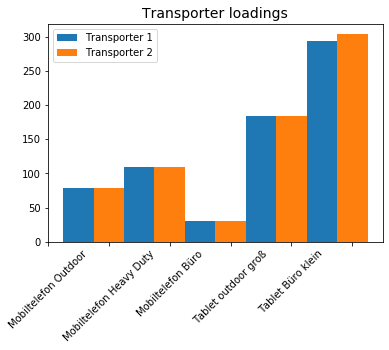

In [17]:
ax = plt.subplot(111)
ax.bar(x - 0.5,result["transporter1"][:5], 0.5, align='center',label='Transporter 1')
ax.bar(x ,result["transporter2"][:5], 0.5, align='center', label='Transporter 2')
plt.xticks(rotation=45)
ax.set_xticklabels(labels)
ax.set_title(r'Transporter loadings', fontsize=14)
ax.legend()

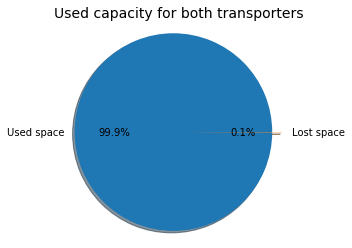

In [10]:
labels = 'Used space', 'Lost space'
sizes = [ladung2+ladung1, max_kap.sum()-ladung2-ladung1]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title(r'Used capacity for both transporters', fontsize=14)
plt.show()